# Áudio 1

In [57]:
# Importando funções
from scipy.io.wavfile import read, write
from numpy.fft import fft, ifft, fftfreq, fftshift
from IPython.display import Audio as play
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Função auxiliar para plotagem de um vetor no domínio da frequência em dB
def spectrum(x_freq):
# 
# x_freq: vetor no domínio da frequência, complexo
#
    x_magnitude = np.abs(x_freq)
    # Normalização para o valor máximo ser 0dB
    x_magnitude /= np.max(x_magnitude)
    return 20*np.log10(x_magnitude)

In [59]:
# Lendo o arquivo .wav para obter o sinal x[n] em forma de vetor

# Obtendo taxa de amostragem e vetor de audio 
taxa_amostragem, audio = read('01.wav')

n_amostras = len(audio)

# Colocando o eixo temporal a partir das amostras
# eixo_t = np.zeros(n_amostras); t_audio = 14
# t_amostra = t_audio/n_amostras # Tempo de cada amostra

# for am in range(1, n_amostras):
#     eixo_t[am] = eixo_t[am - 1] + t_amostra

eixo_t = np.linspace(0, len(audio)/taxa_amostragem, num=len(audio))

# Tocando o áudio com ruído
play(audio, rate=taxa_amostragem)

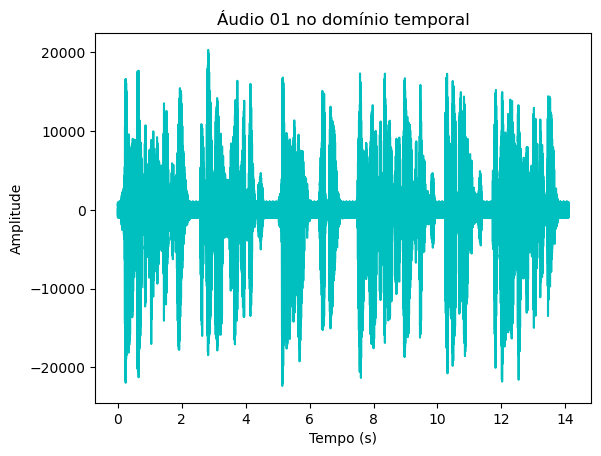

In [60]:
# Plotando o áudio no domínio temporal
plt.plot(eixo_t, audio, color='c')
plt.title('Áudio 01 no domínio temporal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.savefig('original1_tempo.pdf')
plt.show()

In [61]:
# Aplicando a transformada de Fourier para observar o sinal na frequência
audio_freq = fftshift(fft(audio))
eixo_f = fftshift(fftfreq(n_amostras, d = 1/taxa_amostragem)) 

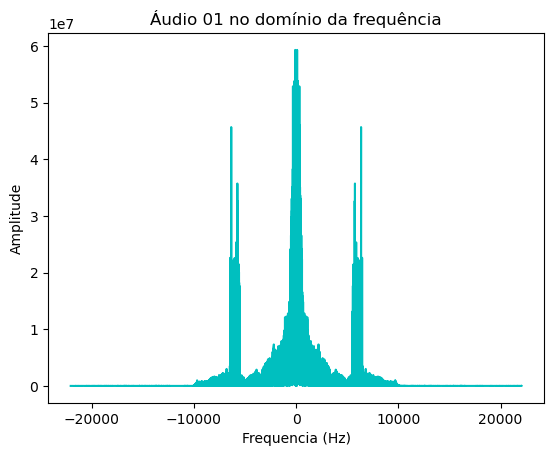

In [62]:
# Plotando o sinal no domínio da frequência
plt.plot(eixo_f, np.abs(audio_freq), color='c')
plt.title("Áudio 01 no domínio da frequência")
plt.ylabel("Amplitude")
plt.xlabel("Frequencia (Hz)")

plt.savefig('original1_freq.pdf')
plt.show()

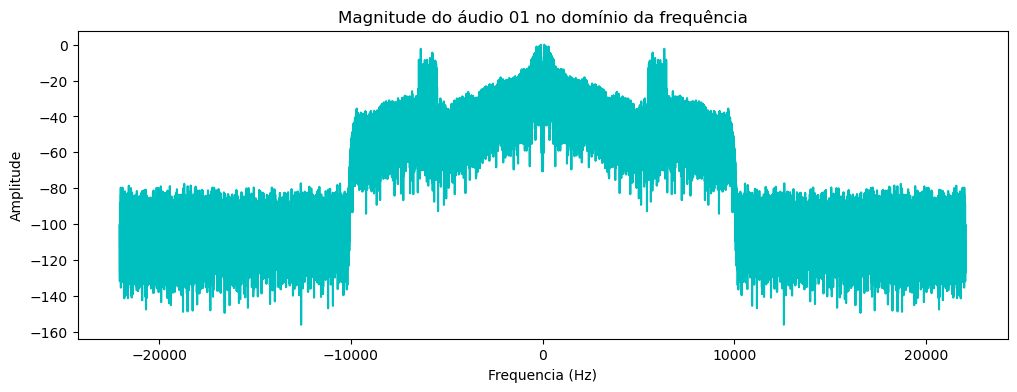

In [63]:
# Plotando a magnitude do sinal da frequência em escala logarítimica
plt.figure(figsize=(12, 4))
plt.plot(eixo_f, spectrum(audio_freq), color='c')
plt.title("Magnitude do áudio 01 no domínio da frequência")
plt.ylabel("Amplitude")
plt.xlabel("Frequencia (Hz)")
#adicionar tics para adicionar as frequencias

plt.savefig('original1_mag.pdf')
plt.show()

In [64]:
# Implementando a convolução entre o filtro e o sinal
# pode usar np.convolve() para comparar os resultados
# caso queira deixar a convolução para botar no rrelatório
# ogritarório fazer convolução na frequencia, não no tempo
# selecionar um segundo do audio para poder usar isso 
# dizer quais são os downgrades (atraso de grupo, etc)
# foi recomendado substituir por .convove para poder deixar mais rapido e mais facil de entender
def convolucao(filtro, sinal):

    n_amostras = sinal.size
    L = filtro.size
    resposta = np.zeros(n_amostras)
    
    for n in range(n_amostras):
        resposta[n] = 0
        for k in range(L-1):
            if (n - k) <= 0 or (n - k) >= n_amostras:
                resposta[n] += 0
            else:
                resposta[n] += (filtro[k]) * sinal[n - k]

    return resposta

In [65]:
def filtro_hamming(sinal, wc, L):

    #colocar a variável size fora
    # filtro vai ter m amostra
    # tamanho do filtro pode ser diferente do tamanho do sinal
    # refatorar a função 
    # fuanc hamming
    # paramentr L e Wc
    # for i in range (L-1)
    # coeff i  = janela func * coeff
    # deixa tudo num for só, e já é capaz de calcular o filtro
    # mostrar a janela e o filtro separado, ai tem que colocar as duas funções
    # também vai ter que colocar o plot do filtro e do sinal
    # uma função só pra janela e pro filtro
    # nao vai precisar do else, pq já vai estar definido
    # função só pra forma
    # sinc ta estranha, pode usar a função sinc do numpy
    # clolcadno a variavel fir do html, pode usar a sinc direto
    # wc/pi * sinc precisa ter por conta do modulo 1 na frequencia(nao normalizada já esta sendo feito (pi dentro), vide doc da sinc)
    # plot em stem pode ser melhor pra ver o filtro
    n_amostras = sinal.size
    alpha = (L - 1)/2
    coeficientes = np.zeros(L)
    janela_func = np.zeros(L) 

    # Função sinc 
    for i in range(L - 1):
        if 0 <= i <= (L - 1):
            coeficientes[i] = wc/np.pi * np.sinc(wc*(i - alpha))
        else:
            coeficientes[i] = 0

    # Função janela
    for i in range(L - 1):
        if 0 <= i <= (L - 1):
            janela_func[i] = 0.54 - 0.46*np.cos(2*np.pi*i)/(L - 1)
        else:
            janela_func[i] = 0

    return coeficientes * janela_func, coeficientes

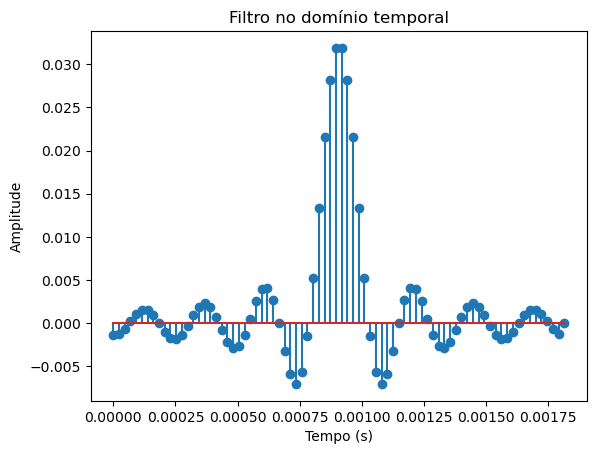

In [66]:
L = 80; wc = 2*np.pi/33

# funcao seno ta fazendo com que o filtro vire um chapeu
# usar a sinc resolve esse problema
filtro_tempo, coeficientes = filtro_hamming(audio, wc, L)
eixo_t_filtro = np.linspace(0, len(filtro_tempo)/taxa_amostragem, num=len(filtro_tempo))

plt.stem(eixo_t_filtro, filtro_tempo)#, #color='b')
plt.title('Filtro no domínio temporal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.savefig('filtro1_tempo.pdf')
plt.show()

In [67]:
# Aplicando a transformada de Fourier para observar o filtro na frequência
filtro_freq = fftshift(fft(filtro_tempo, 512))
eixo_f_filtro = fftshift(fftfreq(512, d = 1/taxa_amostragem)) 
# mudou o L para 512 para poder plotar o filtro

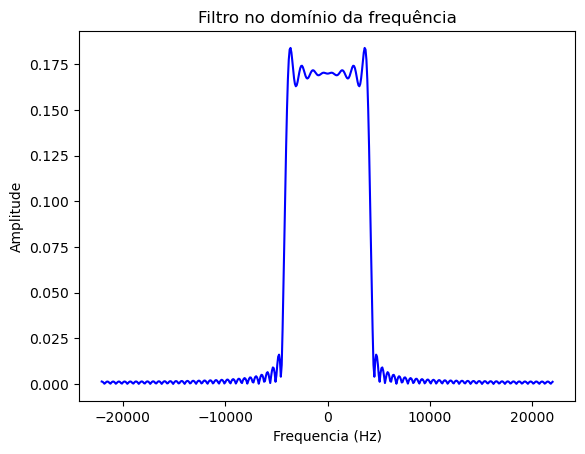

In [68]:
# Plotando o sinal no domínio da frequência
# formato esta estranho
# nao era pra ser 0.6, era pra ser 1 (normalização )
plt.plot(eixo_f_filtro, np.abs(filtro_freq), color='b')
plt.title("Filtro no domínio da frequência")
plt.ylabel("Amplitude")
plt.xlabel("Frequencia (Hz)")

plt.savefig('filtro1_freq.pdf')
plt.show()

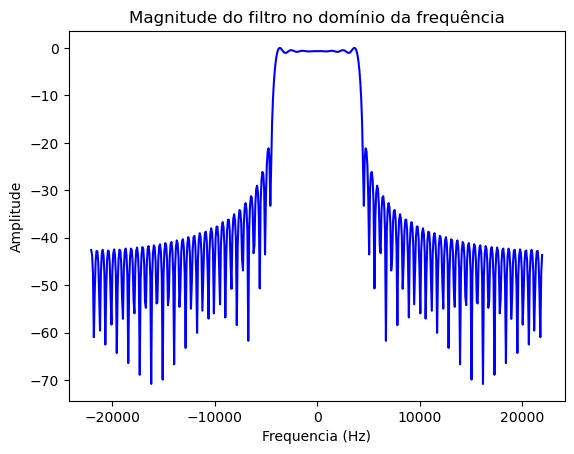

In [69]:
# Plotando a magnitude do sinal da frequência em escala logarítimica
plt.plot(eixo_f_filtro, spectrum(filtro_freq), color='b')
plt.title("Magnitude do filtro no domínio da frequência")
plt.ylabel("Amplitude")
plt.xlabel("Frequencia (Hz)")

plt.savefig('filtro1_mag.pdf')
plt.show()

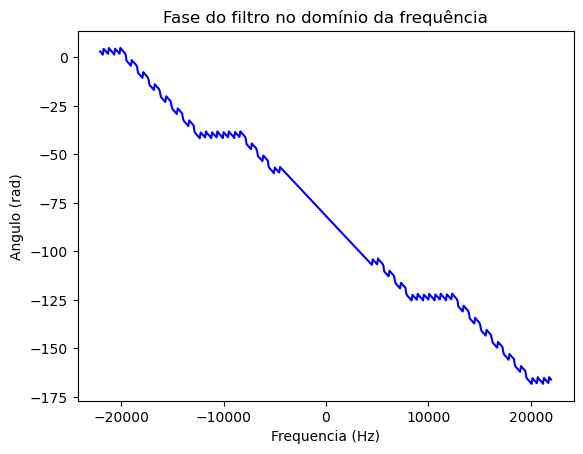

In [70]:
# Plotando a fase do sinal da frequência em escala logarítimica
# ta linear mas ta difcil de ver, unwrap ao redor da freqneucia definida, deixa linear
# doc da unwrap pra poder entender 

plt.plot(eixo_f_filtro, np.unwrap(np.angle(filtro_freq)), color='b')
plt.title("Fase do filtro no domínio da frequência")
plt.ylabel("Angulo (rad)")
plt.xlabel("Frequencia (Hz)")

plt.savefig('filtro1_fase.pdf')
plt.show()

In [71]:
audio_filtrado_hamming = convolucao(filtro_tempo, audio)
# filtragem vai ser multiplicação (propriedada) do filtro e do audio 
# deve adicionar o zero padding nos dois vetores para que fique no tamamnho certo n+ m + 1
# http baseda em convolução circular (chega no final do vetor, volta pro começo)
# doc fftshift fala do tamanho, fftsize = 512

In [72]:
play(audio_filtrado_hamming, rate=taxa_amostragem)

In [ ]:
audio_filtrado_hamming_freq = filtro_freq * np.concatenate((audio, np.zeros(audio.size - 512)))

ValueError: operands could not be broadcast together with shapes (512,) (1243834,) 

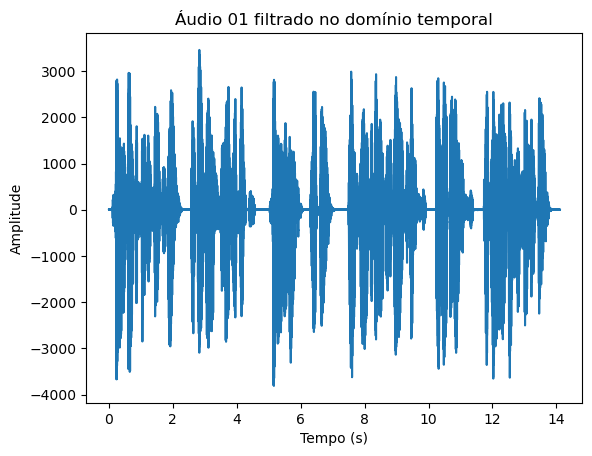

In [73]:
# Plot do sinal filtrado no domínio do tempo
plt.plot(eixo_t, audio_filtrado_hamming)
plt.title('Áudio 01 filtrado no domínio temporal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.savefig('filtrado1_tempo.pdf')
plt.show()

In [74]:
# Aplicando a transformada de Fourier para observar o sinal filtrado na frequência
audio_filtrado_freq = fftshift(fft(audio_filtrado_hamming))

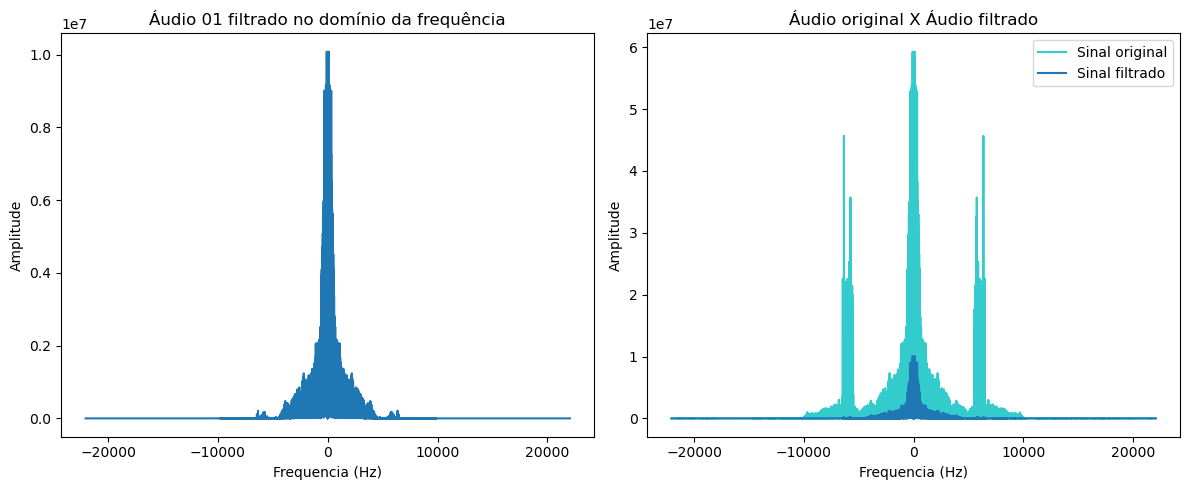

In [75]:
# Plotando o sinal filtrado no domínio da frequência

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(eixo_f, np.abs(audio_filtrado_freq))
ax1.set_title("Áudio 01 filtrado no domínio da frequência")
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Frequencia (Hz)")

ax2.plot(eixo_f, np.abs(audio_freq), alpha=0.8, label='Sinal original', color='c')
ax2.plot(eixo_f, np.abs(audio_filtrado_freq), label='Sinal filtrado')
ax2.set_title("Áudio original X Áudio filtrado")
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Frequencia (Hz)")
ax2.legend()

plt.tight_layout()

plt.savefig('filtrado1_freq.pdf')
plt.show()

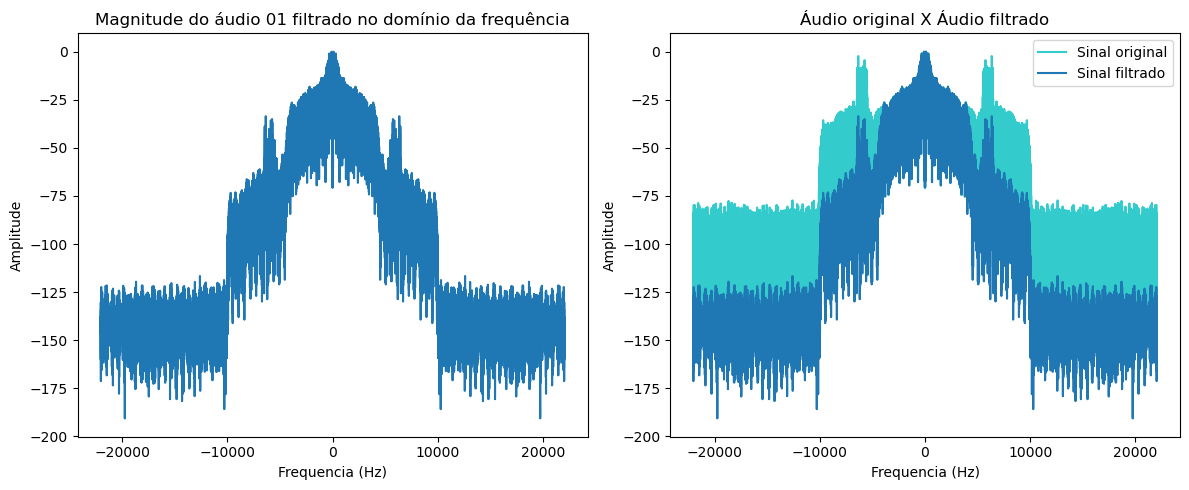

In [76]:
# Plotando a magnitude do sinal filtrado da frequência em escala logarítimica

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(eixo_f, spectrum(audio_filtrado_freq))
ax1.set_title("Magnitude do áudio 01 filtrado no domínio da frequência")
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Frequencia (Hz)")

ax2.plot(eixo_f, spectrum(audio_freq), alpha=0.8, label='Sinal original', color='c')
ax2.plot(eixo_f, spectrum(audio_filtrado_freq), label='Sinal filtrado')
ax2.set_title("Áudio original X Áudio filtrado")
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Frequencia (Hz)")
ax2.legend()

plt.tight_layout()

plt.savefig('filtrado1_mag.pdf')
plt.show()